In [105]:
import pandas as pd

df = pd.read_csv("../data/goolge_trends_MA_BE_immigration.csv")
df = df.transpose()
df.rename(columns=df.iloc[0], inplace=True)
df = df.iloc[1:]
df.index = pd.to_datetime(df.index)
#df.head()
#df.shape()
df

,regroupement familial belgique,maroc consulat belgique,visa belgique casablanca,consulat belgique casablanca,visa schengen,consulat de belgique casablanca,rendez vous visa belgique,consulat de belgique au maroc,ambassade de belgique,tlscontact,visabel,ambassade de belgique au maroc,visa belgique,consulat de belgique a casablanca
2004-04-01,0,39,0,0,100,57,0,44,57,0,0,0,100,0
2005-04-01,0,18,19,23,0,38,0,0,19,0,0,19,25,28
2006-04-01,0,12,0,11,12,14,0,9,12,0,0,14,10,20
2007-04-01,0,9,4,10,17,7,0,5,11,0,0,4,10,0
2008-04-01,0,6,3,4,18,5,0,5,6,0,0,3,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-01,16,0,1,0,23,1,0,0,1,23,29,1,5,1
2017-09-01,37,1,1,2,30,1,15,0,1,60,0,0,4,1
2018-09-01,19,0,1,1,34,1,14,0,1,66,11,1,5,0
2019-09-01,8,1,2,2,30,1,21,0,1,74,7,1,9,1


In [92]:
#columns_str = df[list(df.columns)].apply(lambda x: ','.join(map(str, x)))
#columns_str 
#pd.to_numeric(df['maroc consulat belgique'] , errors='coerce')
#df.columns.values.astype(float)
df.values.astype(float)

array([[  0.,  39.,   0., ...,   0., 100.,   0.],
       [  0.,  18.,  19., ...,  19.,  25.,  28.],
       [  0.,  12.,   0., ...,  14.,  10.,  20.],
       ...,
       [ 19.,   0.,   1., ...,   1.,   5.,   0.],
       [  8.,   1.,   2., ...,   1.,   9.,   1.],
       [  7.,   1.,   1., ...,   1.,   2.,   0.]])

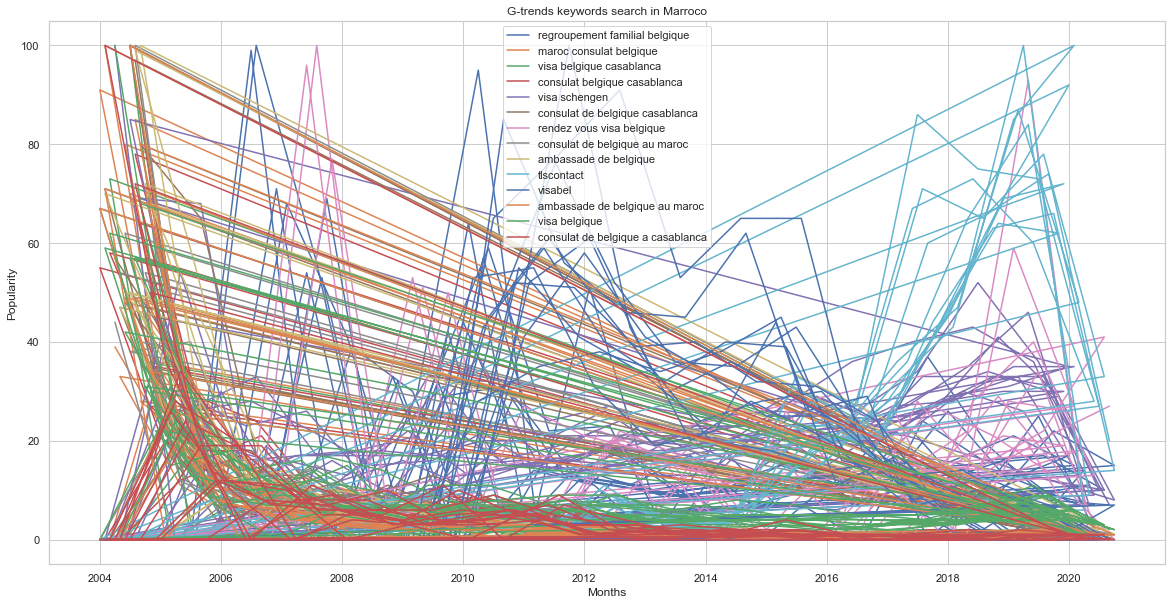

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(df)
plt.title('G-trends keywords search in Marroco')
plt.xlabel('Months')
plt.ylabel('Popularity')
plt.legend(df.columns)
plt.show()

In [120]:
df["day"] = df.index.weekday
df["month"] = df.index.month
df["year"] = df.index.year
df.head()

,regroupement familial belgique,maroc consulat belgique,visa belgique casablanca,consulat belgique casablanca,visa schengen,consulat de belgique casablanca,rendez vous visa belgique,consulat de belgique au maroc,ambassade de belgique,tlscontact,visabel,ambassade de belgique au maroc,visa belgique,consulat de belgique a casablanca,day,hour,month,year
2004-04-01,0,39,0,0,100,57,0,44,57,0,0,0,100,0,3,0,4,2004
2005-04-01,0,18,19,23,0,38,0,0,19,0,0,19,25,28,4,0,4,2005
2006-04-01,0,12,0,11,12,14,0,9,12,0,0,14,10,20,5,0,4,2006
2007-04-01,0,9,4,10,17,7,0,5,11,0,0,4,10,0,6,0,4,2007
2008-04-01,0,6,3,4,18,5,0,5,6,0,0,3,6,6,1,0,4,2008


In [130]:
#df.pivot_table(df, values='regroupement familial belgique', index='month', aggfunc=np.sum)
import numpy as np
df_day = df.groupby('day')
df_day = df_day.apply(np.mean).drop(df[['day','hour','month','year']], axis=1)
df_day

,regroupement familial belgique,maroc consulat belgique,visa belgique casablanca,consulat belgique casablanca,visa schengen,consulat de belgique casablanca,rendez vous visa belgique,consulat de belgique au maroc,ambassade de belgique,tlscontact,visabel,ambassade de belgique au maroc,visa belgique,consulat de belgique a casablanca
day,,,,,,,,,,,,,,
0,14.592593,5.185185,3.962963,7.111111,19.185185,4.814815,5.444444,4.629630,7.074074,16.481481,17.592593,3.777778,10.148148,5.777778
1,14.034483,8.551724,1.275862,5.620690,22.034483,7.068966,5.655172,5.896552,6.413793,13.862069,16.724138,5.413793,8.275862,5.965517
2,12.551724,5.379310,3.034483,7.482759,23.275862,8.000000,11.137931,5.862069,7.137931,16.586207,21.103448,6.103448,9.793103,3.620690
3,13.533333,10.000000,4.733333,9.000000,27.933333,13.000000,7.366667,5.233333,7.766667,13.666667,16.166667,7.700000,11.000000,3.300000
4,14.448276,5.620690,3.275862,6.689655,19.482759,6.103448,13.620690,5.379310,6.413793,18.517241,16.793103,5.896552,6.931034,4.620690
5,18.392857,5.892857,1.750000,4.428571,17.964286,6.035714,9.464286,5.500000,5.714286,18.178571,17.357143,3.892857,6.535714,2.428571
6,7.000000,9.600000,2.900000,5.666667,21.533333,8.966667,8.366667,6.000000,9.066667,16.133333,17.400000,6.833333,9.733333,9.366667


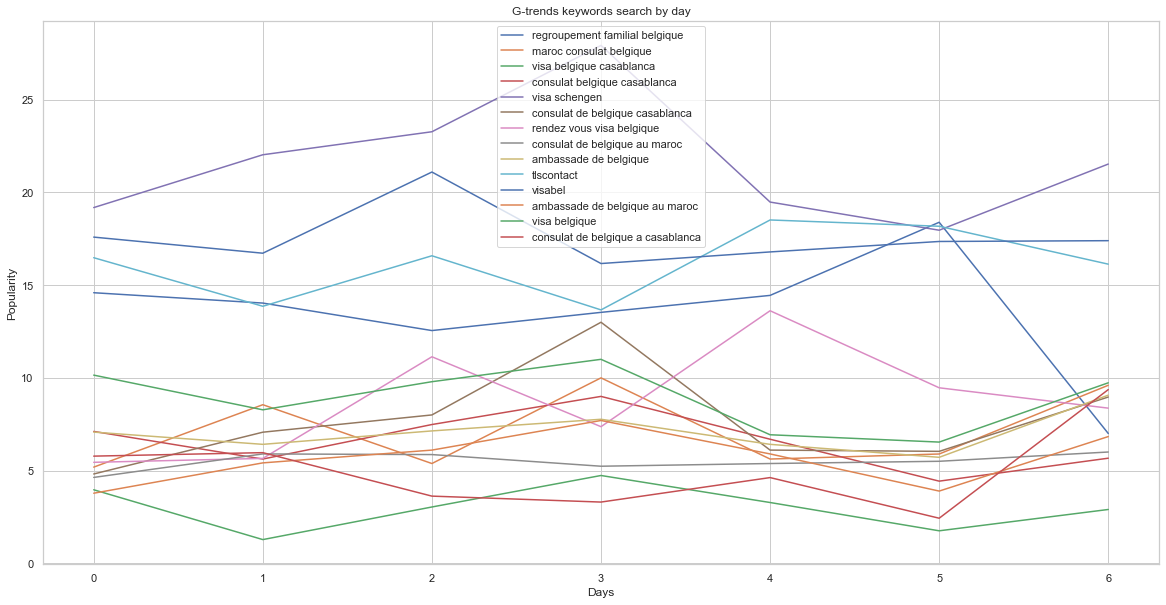

In [133]:
plt.figure(figsize=(20,10))
plt.plot(df_day)
plt.title('G-trends keywords search by day')
plt.xlabel('Days')
plt.ylabel('Popularity')
plt.legend(df_day.columns)
plt.show()

In [135]:
df_month = df.groupby('month')
df_month = df_month.apply(np.mean).drop(df[['day','hour','month','year']], axis=1)
df_month

,regroupement familial belgique,maroc consulat belgique,visa belgique casablanca,consulat belgique casablanca,visa schengen,consulat de belgique casablanca,rendez vous visa belgique,consulat de belgique au maroc,ambassade de belgique,tlscontact,visabel,ambassade de belgique au maroc,visa belgique,consulat de belgique a casablanca
month,,,,,,,,,,,,,,
1,10.235294,9.529412,1.117647,7.176471,16.941176,8.411765,8.588235,4.058824,2.823529,15.705882,14.882353,7.470588,6.000000,3.058824
2,19.647059,9.411765,0.647059,4.294118,20.000000,8.411765,6.647059,1.823529,9.411765,17.588235,13.294118,6.529412,10.058824,10.352941
3,9.588235,4.647059,5.764706,7.294118,19.705882,2.941176,7.470588,3.764706,2.235294,15.411765,15.647059,3.411765,9.176471,3.411765
4,12.529412,5.941176,2.352941,4.470588,23.941176,8.470588,4.294118,4.764706,7.352941,14.058824,15.764706,3.117647,11.882353,4.470588
5,11.058824,4.941176,1.176471,4.294118,22.705882,6.529412,12.764706,6.235294,6.470588,15.058824,16.764706,2.647059,6.882353,5.117647
6,16.411765,9.176471,2.411765,5.235294,25.882353,8.294118,12.529412,6.470588,7.882353,17.705882,17.352941,5.529412,10.000000,3.882353
7,11.705882,9.058824,7.647059,10.705882,28.823529,11.176471,7.235294,7.235294,7.411765,19.882353,20.941176,9.588235,10.647059,4.058824
8,18.705882,10.000000,4.470588,10.529412,21.647059,10.470588,17.470588,9.470588,11.823529,18.588235,25.941176,6.823529,11.000000,8.941176
9,15.411765,5.352941,2.058824,8.352941,25.352941,11.647059,4.529412,5.235294,9.764706,16.411765,21.588235,7.470588,11.705882,4.470588


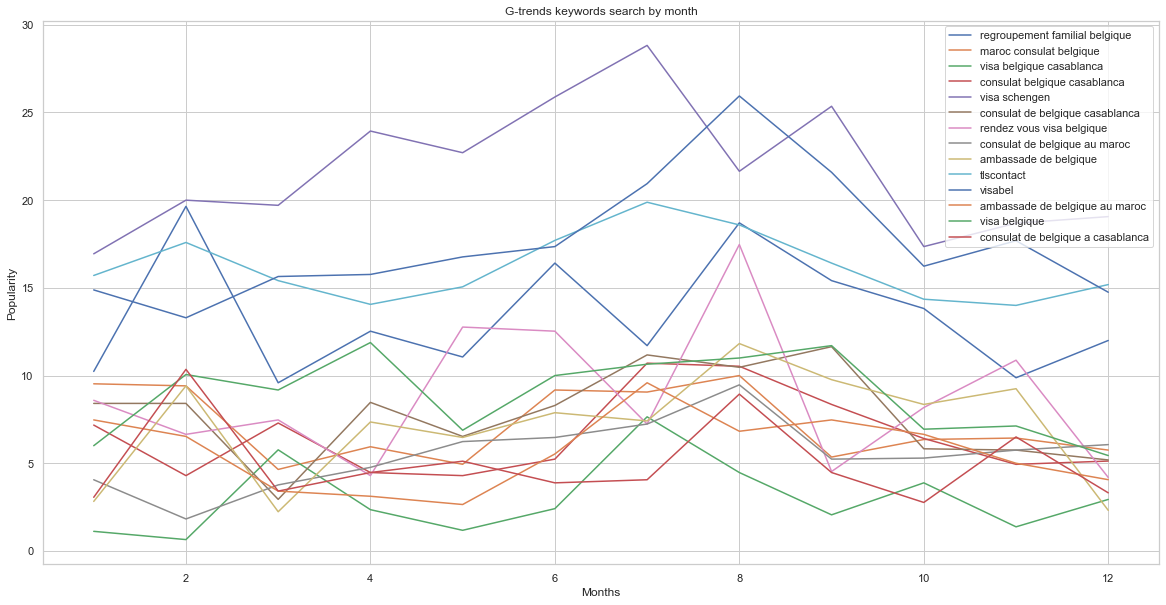

In [136]:
plt.figure(figsize=(20,10))
plt.plot(df_month)
plt.title('G-trends keywords search by month')
plt.xlabel('Months')
plt.ylabel('Popularity')
plt.legend(df_month.columns)
plt.show()

In [138]:
df_year = df.groupby('year')
df_year = df_year.apply(np.mean).drop(df[['day','hour','month','year']], axis=1)
df_year

,regroupement familial belgique,maroc consulat belgique,visa belgique casablanca,consulat belgique casablanca,visa schengen,consulat de belgique casablanca,rendez vous visa belgique,consulat de belgique au maroc,ambassade de belgique,tlscontact,visabel,ambassade de belgique au maroc,visa belgique,consulat de belgique a casablanca
year,,,,,,,,,,,,,,
2004,0.000000,54.833333,23.666667,39.500000,24.916667,55.833333,0.000000,41.833333,51.083333,0.000000,0.000000,45.583333,44.000000,18.500000
2005,0.000000,22.166667,4.500000,19.583333,25.916667,24.750000,0.000000,14.416667,25.083333,0.000000,0.000000,17.750000,18.333333,19.833333
2006,22.500000,9.583333,3.166667,11.250000,15.666667,10.583333,0.000000,6.666667,9.000000,0.000000,0.000000,9.000000,10.583333,10.833333
2007,25.000000,7.333333,1.916667,6.833333,14.750000,7.000000,22.750000,8.833333,8.250000,0.000000,0.000000,4.583333,9.833333,6.750000
2008,12.083333,6.750000,2.000000,6.333333,12.916667,6.250000,0.000000,4.833333,5.083333,0.000000,0.000000,3.166667,7.750000,5.166667
2009,16.000000,5.583333,1.500000,6.166667,19.166667,6.416667,12.833333,4.916667,4.500000,0.000000,0.000000,3.416667,6.000000,4.833333
2010,31.583333,3.583333,2.583333,5.250000,20.166667,5.500000,0.000000,3.500000,3.166667,0.000000,42.250000,2.166667,7.000000,4.250000
2011,11.416667,2.416667,1.666667,4.500000,17.083333,4.250000,2.250000,1.916667,2.666667,0.333333,58.833333,1.916667,6.166667,4.916667
2012,17.333333,1.416667,1.583333,2.250000,20.416667,2.250000,8.833333,1.166667,2.083333,6.916667,48.166667,1.583333,5.916667,1.916667


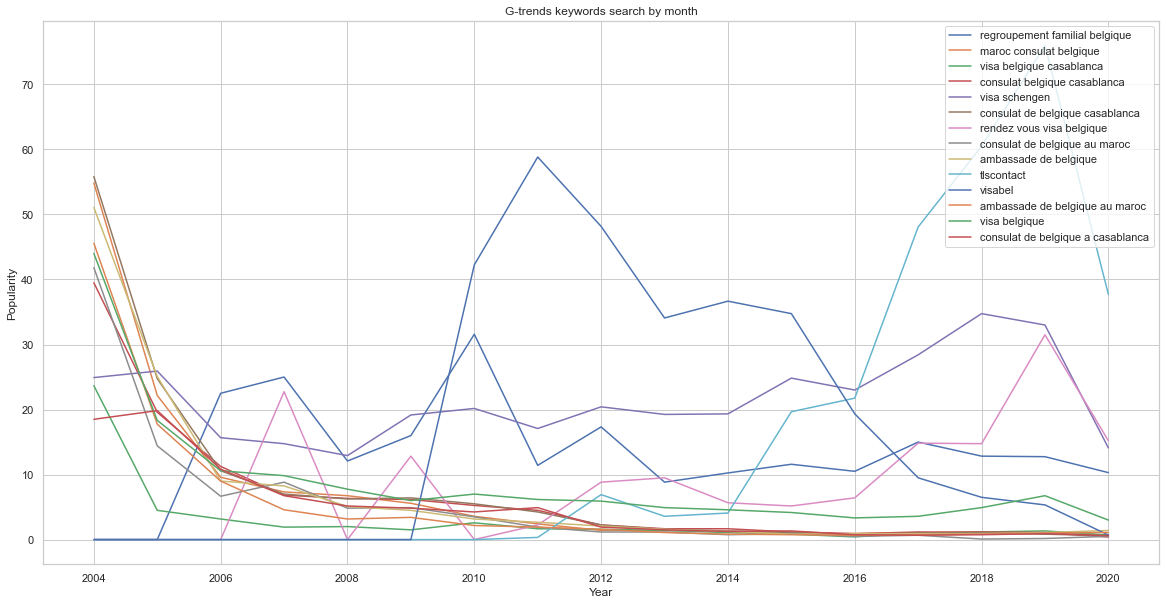

In [140]:
plt.figure(figsize=(20,10))
plt.plot(df_year)
plt.title('G-trends keywords search by month')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.legend(df_year.columns)
plt.show()